## Contents:

Ways of detecting missing values

Standarrd and non-standard missing values

Basic imputation methods for replacing missing values

Identifying and removing Duplicates from your data

Outlier detection - visually

Outlier detection - by Z-scores

Replacing outliers by median

Outlier detection - by IQR

Replacing outliers by whiskers

Remove or modify incorrect or unwanted observations

# Dealing with Missing Values

Here, We will discuss how to find and deal with missing values in a datast

In [2]:
## Importing the library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Reading the data:

In [5]:
# The Dataset has information about some cities and states.

In [7]:
Data = pd.read_csv('data.csv') # read the data
Data.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


Observe the data and see if you can recognise missing values or garbage values in the data

Data type of missing values don't necessarily have to be np.nan

Based on the context we often decide what should be a missing value and what qualifies as valid data

# Dealing with Duplicates in your data

In [8]:
##Identify duplicates records in the data
dupes = Data.duplicated()
sum(dupes)

13

In [9]:
##here we can see that there are 13 duplicated rows. We want to remove the duplicate rows.

#Removing Duplicates
Data =Data.drop_duplicates()

In [10]:
#Now check the duplicate data again and you will see that there are no duplicate rows.
dupes = Data.duplicated()
sum(dupes)

0

In [11]:
## Dealing with Missing Values in your data

## Standard Missing Values

Going back to our original dataset, let’s take a look at the “Number” column.

In [13]:
# What isnull() function recognises as missing value

pd.DataFrame({'value' : Data['Number'], 'Missing?' : Data['Number'].isnull()}) 

,value,Missing?
0,123456.0,False
1,54321.0,False
2,87654.0,False
3,3456.0,False
4,7654.0,False
5,NaN,True
6,87654.0,False
7,6789.0,False
8,NaN,True
9,4567.0,False


In [14]:
## 'NaN' is recognised as missing value

## Non-Standard Missing Values

In [16]:
# What isnull() does not recognise as missing value

pd.DataFrame({'value' : Data['Shape Reported'], 'Missing value?': Data['Shape Reported'].isnull()})

,value,Missing value?
0,TRIANGLE,False
1,NaN,True
2,OVAL,False
3,DISK,False
4,LIGHT,False
5,NaN,True
6,CIRCLE,False
7,DISK,False
8,12,False
9,CYLINDER,False


Only 'NaN' is recognised as missing value

Depending on the context, we decide what should be a missing value

## Unexpected Missing Values

In [17]:
pd.DataFrame({'value': Data['State'], 'Missing?' : Data['State'].isnull()})

,value,Missing?
0,NY,False
1,NJ,False
2,CO,False
3,KS,False
4,NY,False
5,N,False
6,CA,False
7,MI,False
8,AK,False
9,NaN,True


Because all the fields are names of states, 5th element and 12th element can be considered as garbage values

In [18]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( Data.isnull().sum(), columns = ['Number of missing values'])

,Number of missing values
Number,3
City,0
Colors Reported,9
Shape Reported,2
State,1
Time,0


# Any missing values ? 

In [19]:
Data.isnull().values.any() # Does any of the values in the datarame is a missing value

True

# Total number of missings values

In [21]:
Data.isnull().sum().sum() # Total number of recognised missing values in the entire dataframe

15

# Replacing Missing Values

There are many values in which missing values can be replaced by different values which is often called as imputing missing values. It depends on your data and the problem you are trying to solve. In the below cell different types of missing value imputations are shown.

In [23]:
# Replacing NaN with a custom value
Data['Number'].fillna(12345, inplace = True)

# Replace NaN values with the mean of the column
# Data['Number'].fillna(Data.Number.mean(), inplace = True)

# Replace NaN values with the median of the column
# Data['Number'].fillna(Data.Number.median(), inplace = True)

Data

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,12345.0,Valley City,NaN,NaN,N,9/15/1934 15:30
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
7,6789.0,Alma,NaN,DISK,MI,7/15/1936 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
9,4567.0,Hubbard,red,CYLINDER,NaN,6/15/1937 0:00


# Location based replacement

In [24]:
Data.loc[2, 'Number'] = 1234 # replace a value at a specific location
Data

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,1234.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,12345.0,Valley City,NaN,NaN,N,9/15/1934 15:30
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
7,6789.0,Alma,NaN,DISK,MI,7/15/1936 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
9,4567.0,Hubbard,red,CYLINDER,NaN,6/15/1937 0:00


## Droping Rows with Missing Values

In [25]:
Data.dropna(inplace=True)  # Drops all the rows that have atleast one missing values
Data.isnull().sum()

Number             0
City               0
Colors Reported    0
Shape Reported     0
State              0
Time               0
dtype: int64

In [26]:
Data

,Number,City,Colors Reported,Shape Reported,State,Time
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
20,876.0,Keokuk,not known,@,IA,7/7/1939 2:00
21,5432.0,Ludington,*****,DISK,MI,6/1/1941 13:00


Getting rid of rows with missing values is the easiest way of dealing with their presence

But the downside is that we lose valid data from other columns which do not have missing values for that particular row

## Dealing with incorrect or unwanted observations

In [27]:
Data.tail()

,Number,City,Colors Reported,Shape Reported,State,Time
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
20,876.0,Keokuk,not known,@,IA,7/7/1939 2:00
21,5432.0,Ludington,*****,DISK,MI,6/1/1941 13:00


Here you can see some incorrect and currupted values like **** and @ in your data. You need to look for such values manually sometime and you can also use summary stats or plots to find such values.

## These values can be modified based on the problem you are trying to solve and what is required for your case.

Here we can say that **** value can be replaced by null or most common color value and @ is also like a null value which can be imputed based on the methods shown above.

In [29]:
## Try modifying these incorrect values based on our case.

## Dealing with Outliers

In the part given below we will discuss about outliers in a dataset.



## About DataSet :

We will be using Boston House Pricing Dataset which is included in the sklearn dataset API. We will load the dataset and separate out the features and targets.

In [30]:
# Importing the library:

In [62]:
#import load_boston


In [63]:
#raw_df.head()

In [76]:
import pandas as pd
import numpy as np


boston_df = pd.read_csv("boston_house_prices.csv")


In [77]:
 boston_df.head()

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [79]:



# Assuming df is your DataFrame containing the dataset
# Replace df with the name of your DataFrame

# Remove the first column
boston_df = boston_df.drop(boston_df.columns[0], axis=1)

# Set the first row as column names
boston_df.columns = boston_df.iloc[0]

# Drop the first row after setting it as column names
boston_df = boston_df.drop(boston_df.index[0])

# Reset the index
boston_df.reset_index(drop=True, inplace=True)

# Now df will have the desired format with the first row as column names and the first column removed
print(boston_df)

0    INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX PTRATIO       B LSTAT  \
0     2.31    0  0.538  6.575  65.2    4.09   1  296    15.3   396.9  4.98   
1     7.07    0  0.469  6.421  78.9  4.9671   2  242    17.8   396.9  9.14   
2     7.07    0  0.469  7.185  61.1  4.9671   2  242    17.8  392.83  4.03   
3     2.18    0  0.458  6.998  45.8  6.0622   3  222    18.7  394.63  2.94   
4     2.18    0  0.458  7.147  54.2  6.0622   3  222    18.7   396.9  5.33   
..     ...  ...    ...    ...   ...     ...  ..  ...     ...     ...   ...   
501  11.93    0  0.573  6.593  69.1  2.4786   1  273      21  391.99  9.67   
502  11.93    0  0.573   6.12  76.7  2.2875   1  273      21   396.9  9.08   
503  11.93    0  0.573  6.976    91  2.1675   1  273      21   396.9  5.64   
504  11.93    0  0.573  6.794  89.3  2.3889   1  273      21  393.45  6.48   
505  11.93    0  0.573   6.03  80.8   2.505   1  273      21   396.9  7.88   

0   PRICE  
0      24  
1    21.6  
2    34.7  
3    33.4  
4  

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Discover outliers with visualization tools

### Box plot-

<Axes: xlabel='DIS'>

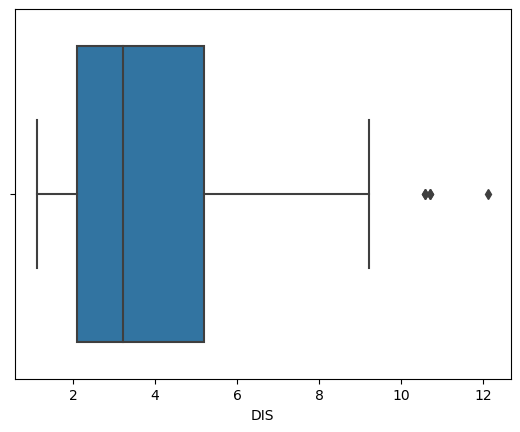

In [83]:
# Convert 'DIS' column to numeric
boston_df['DIS'] = pd.to_numeric(boston_df['DIS'])

# Plot boxplot
sns.boxplot(x=boston_df['DIS'])

**Note:** Above plot shows three points between 10 to 12, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

In [84]:
## Scatter plot-

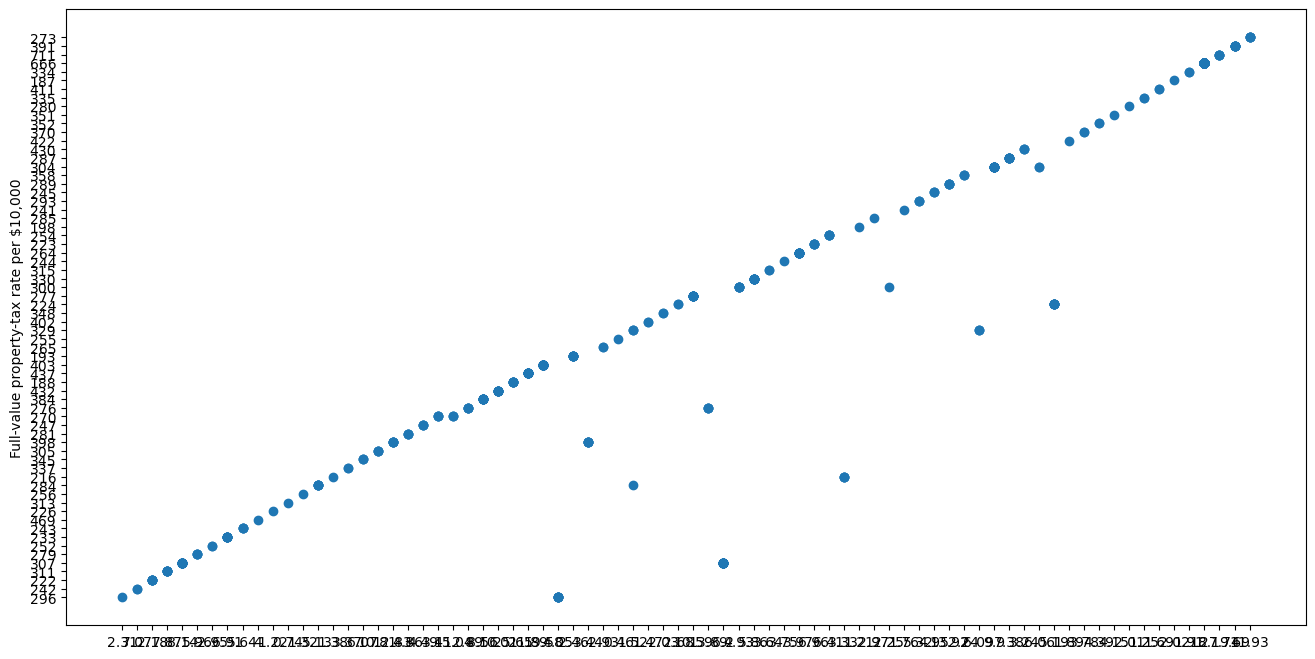

In [85]:
fig, ax = plt.subplots(figsize = (16,8)) # setting the figure size of the plot
ax.scatter(boston_df['INDUS'], boston_df['TAX']) # scatter plot
ax.set_ylabel('non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Discover outliers with mathematical function
 ## Z-Score-

In [92]:
from scipy import stats
import numpy as np
# Convert all columns to numeric (excluding non-numeric columns like object/string columns)
boston_df_numeric = boston_df.apply(pd.to_numeric, errors = 'coerce')
# Remove rows with missing values
boston_df_numeric = boston_df_numeric.dropna()
# compute z - scores
z = np.abs(stats.zscore(boston_df_numeric))   # get the z-score of every value with respect to their columns
print(z)

0       INDUS      CHAS       NOX        RM       AGE       DIS       RAD  \
0    1.287909  0.272599  0.144217  0.413672  0.120013  0.140214  0.982843   
1    0.593381  0.272599  0.740262  0.194274  0.367166  0.557160  0.867883   
2    0.593381  0.272599  0.740262  1.282714  0.265812  0.557160  0.867883   
3    1.306878  0.272599  0.835284  1.016303  0.809889  1.077737  0.752922   
4    1.306878  0.272599  0.835284  1.228577  0.511180  1.077737  0.752922   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.115738  0.272599  0.158124  0.439316  0.018673  0.625796  0.982843   
502  0.115738  0.272599  0.158124  0.234548  0.288933  0.716639  0.982843   
503  0.115738  0.272599  0.158124  0.984960  0.797449  0.773684  0.982843   
504  0.115738  0.272599  0.158124  0.725672  0.736996  0.668437  0.982843   
505  0.115738  0.272599  0.158124  0.362767  0.434732  0.613246  0.982843   

0         TAX   PTRATIO         B     LSTAT     PRICE  
0    0.666608  1.45

Note: Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [93]:
threshold = 3
np.where(z > threshold)

(array([102, 141, 142, 152, 154, 155, 160, 162, 163, 208, 209, 210, 211,
        212, 216, 218, 219, 220, 221, 222, 225, 234, 236, 257, 262, 269,
        273, 274, 276, 277, 282, 283, 351, 352, 353, 354, 355, 356, 357,
        358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374, 406,
        410, 411, 412, 412, 414, 415, 416, 418, 419, 423, 424, 425, 426,
        427, 429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466],
       dtype=int64),
 array([ 9, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  3,  1,  1,  3,  3,  1,  1,  1,  1,  1,  1,  1,  5,  5,
         5,  5,  5,  1,  1,  1,  1,  1,  3,  3,  3,  1,  1,  1, 10,  3, 10,
         3,  9,  9,  9, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9], dtype=int64))

In [94]:
## IQR  -

In [96]:
Q1 = boston_df_numeric.quantile(0.25)
Q3 = boston_df_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0
INDUS       12.91000
CHAS         0.00000
NOX          0.17500
RM           0.73800
AGE         49.05000
DIS          3.08825
RAD         20.00000
TAX        387.00000
PTRATIO      2.80000
B           20.84750
LSTAT       10.00500
PRICE        7.97500
dtype: float64


In [98]:
np.where((boston_df_numeric < (Q1 - 1.5 * IQR)) | (boston_df_numeric > (Q3 + 1.5 * IQR)))

(array([ 18,  25,  27,  32,  34,  97,  97,  98,  98, 102, 118, 134, 141,
        142, 145, 146, 151, 152, 152, 153, 154, 154, 155, 155, 156, 157,
        160, 160, 161, 162, 162, 162, 163, 163, 163, 165, 166, 166, 167,
        168, 169, 170, 179, 180, 180, 182, 186, 186, 190, 195, 195, 196,
        197, 198, 202, 203, 203, 204, 204, 208, 209, 210, 211, 212, 216,
        218, 219, 220, 221, 222, 224, 224, 225, 225, 226, 226, 228, 232,
        232, 233, 233, 234, 236, 253, 253, 256, 257, 257, 257, 258, 259,
        260, 261, 261, 262, 262, 262, 263, 264, 265, 266, 267, 267, 267,
        268, 268, 269, 273, 274, 276, 277, 280, 280, 282, 282, 283, 283,
        283, 286, 291, 351, 352, 353, 354, 355, 356, 357, 358, 363, 364,
        364, 365, 366, 367, 367, 368, 369, 369, 370, 370, 371, 372, 372,
        373, 374, 374, 384, 384, 386, 387, 398, 399, 404, 405, 406, 407,
        408, 409, 410, 411, 412, 412, 412, 413, 414, 414, 414, 415, 416,
        417, 418, 419, 420, 421, 422, 423, 424, 425

In [99]:
## Working with Outliers: Correcting , Removing

In [100]:
# z-Scoreithout 

In [101]:
boston_df1 = boston_df_numeric[(z < 3).all(axis=1)] # select only the rows without a single outlier
boston_df1.shape, boston_df.shape

((431, 12), (506, 12))

In [104]:
boston_df2 = boston_df_numeric.copy()   #make a deep copy of the dataframe

#Replace all the outliers with median values. This will create new some outliers but, we will ignore them

for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):# iterate using 2 variables.i for rows and j for columns
    boston_df2.iloc[i,j] = boston_df.iloc[:,j].median()  # replace i,jth element with the median of j i.e, corresponding column

In [105]:
z = np.abs(stats.zscore(boston_df2))
np.where(z > threshold)  # New outliers detected after imputing the original outlier

(array([145, 146, 155, 156, 163, 224, 232, 233, 253, 267, 367, 384, 409,
        413, 414, 417, 428, 430, 432, 433, 434, 435, 438], dtype=int64),
 array([ 9,  9,  9,  9,  3,  3,  3,  3,  3,  3,  9,  3,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9, 10], dtype=int64))

### 2. IQR Score 

Just like Z-score we can use previously calculated IQR score to filter out the outliers by keeping only valid values

In [108]:
boston_df_out = boston_df_numeric[~((boston_df_numeric < (Q1-1.5 * IQR)) |(boston_df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers

In [109]:
boston_df_out.shape

(343, 12)

In [112]:
boston_df4 = boston_df_numeric.copy()

In [113]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(boston_df4 < Q1 - 1.5 * IQR)[0], np.where(boston_df4 > Q3+ 1.5 * IQR)[1]):
    
    whisker = Q3 + 1.5 * IQR
    boston_df4.iloc[i,j] = whisker[j]
    
    
    
# Replace every outlier on the upper side by the upper whisker
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(boston_df4 > Q3 + 1.5 * IQR)[0], np.where(boston_df4 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    boston_df4.iloc[i,j] = whisker[j]
    

In [114]:
boston_df4.shape, boston_df.shape

((506, 12), (506, 12))